<a href="https://colab.research.google.com/github/ShebinCZacharia/EDA/blob/main/Copy_of_EDA_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - AirBnb Bookings Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Problem Statement**


Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. This dataset has around 49000 rows and 16 columns. Explore and analyze the data to discover key understandings.

#### **Define Your Business Objective?**

To understand customers' and providers' behaviours and performance on platform, to take business decisions, guiding marketing initiatives and implementation of innovative additional services.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [50]:
# Load Dataset
working_directory = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Module 1/Capstone Project 1/Data/'
file_path = 'Airbnb NYC 2019.csv'
df = pd.read_csv(working_directory + file_path)

### Dataset First View

In [51]:
# Dataset First Look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [52]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


### Dataset Rows & Columns count

In [53]:
# Dataset Rows & Columns count
rows, columns = df.shape
print(f'Number of rows in the dataset are {rows}')
print(f'Number of columns in the dataset are {columns}')

Number of rows in the dataset are 48895
Number of columns in the dataset are 16


### Dataset Information

In [54]:
# Dataset Info
df.info

<bound method DataFrame.info of              id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

       

#### Duplicate Values

In [55]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [56]:
# Missing Values/Null Values Count
column_wise_missing_values = df.isna().sum()
total_missing_values = column_wise_missing_values.sum()
print(column_wise_missing_values)
print('\n')
print(f'Total missing values are {total_missing_values}')

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


Total missing values are 20141


Text(0, 0.5, 'number of missing values')

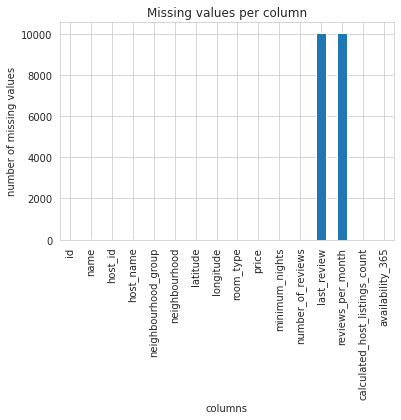

In [57]:
# Visualizing the missing values
column_wise_missing_values.plot(kind='bar')
plt.title('Missing values per column')
plt.xlabel('columns')
plt.ylabel('number of missing values')

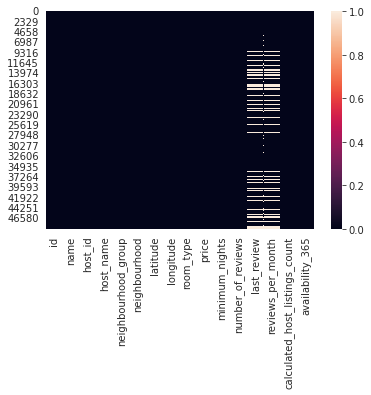

In [58]:
sns.heatmap(df.isna())

### What did you know about your dataset?

1.It is a relatively smaller data set with about 49,000 entries and 16 columns.

2.Above dataset has no duplicate entries.

3.The null values in columns 'last_review' and 'reviews_per_month' probably exits because no reviews were published for that particular Id.

## ***2. Understanding Your Variables***

In [59]:
# Dataset Columns
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [60]:
# Dataset Describe

df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### Variables Description 

1.id : It is the unique Id of the listing.

2.name : Name of the listing.

3.host_id : Unique host_id

4.host_name : Name of the host.

5.neighbourhood_group : location

6.neighbourhood : area

7.lattitude : lattitude range.

8.longitude : longitude range

9.price : price of listing.

10.min_nights : minimum nights to be paid for.

11.number_of_reviews : number of reviews.

12.last_review : content of the last review.

13.review_per_month : number of checks per month.

14.calculated_host_listings_count : Total count.

15.availability_365 : availability around the year.

### Check Unique Values for each variable.

In [61]:
column_list = list(df.columns.values)

In [62]:
# Check Unique Values for each variable.
for item in column_list:
  print(f'Unique {item} : {df[item].nunique()}')

Unique id : 48895
Unique name : 47905
Unique host_id : 37457
Unique host_name : 11452
Unique neighbourhood_group : 5
Unique neighbourhood : 221
Unique latitude : 19048
Unique longitude : 14718
Unique room_type : 3
Unique price : 674
Unique minimum_nights : 109
Unique number_of_reviews : 394
Unique last_review : 1764
Unique reviews_per_month : 937
Unique calculated_host_listings_count : 47
Unique availability_365 : 366


## 3. ***Data Wrangling***

### Data Wrangling Code

Dealing with '0' values in price column.

In [63]:
# Removing the listings with price 0, which is an anomaly.
df = df[df['price'] != 0]

Converting dtype of last review column for analysis.

In [64]:
# Converting last_review column to datetime object.
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%M-%d')

<ipython-input-64-cd04f1dfd44b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%M-%d')


In [65]:
# Extracting month.
df['last_review_month'] = df['last_review'].dt.strftime('%b')
df['last_review_month'] = df['last_review_month'].fillna('0')

<ipython-input-65-33ad91986821>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review_month'] = df['last_review'].dt.strftime('%b')
<ipython-input-65-33ad91986821>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_review_month'] = df['last_review_month'].fillna('0')


In [66]:
# checking unique values.
df['last_review_month'].unique()

array(['Jan', '0'], dtype=object)

In [67]:
# Extracting year from the modified column to add a new colum named year to the dataframe.
df['year'] = df['last_review'].dt.year

<ipython-input-67-f5b5581accc1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['last_review'].dt.year


In [68]:
# Changing the dtype to int instead of float.
df['year'] = df['year'].fillna('0').astype(int)

<ipython-input-68-15dcf39b15e7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].fillna('0').astype(int)


In [69]:
# Dropping the last_review column.
df.drop(['last_review'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [70]:
# Renaming year to last_review_year
df.rename(columns={'year': 'last_review_year'}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [71]:
# First view after the operations.
df.head(100)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,Jan,2018
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,Jan,2019
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365,0,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,Jan,2019
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,Jan,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21293,Sunny Apartment in Artist Home,44145,Tyrome,Brooklyn,Bushwick,40.70093,-73.92609,Entire home/apt,105,3,118,1.05,2,9,Jan,2019
96,21456,Light-filled classic Central Park,42032,Dana,Manhattan,Upper West Side,40.79764,-73.96177,Entire home/apt,140,3,81,0.71,1,198,Jan,2019
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,0.11,1,365,Jan,2018
98,21794,COZY QUIET room 4 DOOGLERS!,83257,Olan,Manhattan,Chelsea,40.74008,-74.00271,Private room,98,30,30,0.27,2,364,Jan,2019


Specific Ideas that can be inferred from the dataframe.



In [72]:
#neighbourhood wise and neighbourhood_group wise count of listings
county = df.groupby('neighbourhood_group')['id'].count().reset_index(name='listings').sort_values(by=['listings'])
cities = df.groupby('neighbourhood')['id'].count().reset_index(name='listings')

In [73]:
county

,neighbourhood_group,listings
4,Staten Island,373
0,Bronx,1090
3,Queens,5666
1,Brooklyn,20095
2,Manhattan,21660


In [74]:
cities

,neighbourhood,listings
0,Allerton,42
1,Arden Heights,4
2,Arrochar,21
3,Arverne,77
4,Astoria,900
...,...,...
216,Windsor Terrace,157
217,Woodhaven,88
218,Woodlawn,11
219,Woodrow,1


In [75]:
# neighbourhood with maximum listings.
cities[cities['listings'] == cities['listings'].max()]

,neighbourhood,listings
214,Williamsburg,3919


In [76]:
# neighbourhood_group with maximum listings.
county[county['listings'] == county['listings'].max()]

,neighbourhood_group,listings
2,Manhattan,21660


In [77]:
# Host with maximum listings
max_listings_count = df['calculated_host_listings_count'].max()
max_listings_host_id = df.loc[df['calculated_host_listings_count'] == max_listings_count, 'host_id'].unique()

In [78]:
print(f'Host with id {int(max_listings_host_id)} has maximum listings of {max_listings_count}')

Host with id 219517861 has maximum listings of 327


In [79]:
# Exploring different room types.
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [80]:
# Determining which room type is most expensive.
avg_room_type_tariff = df.groupby('room_type')['price'].mean().round(2).to_frame()
avg_room_type_tariff[avg_room_type_tariff['price'] == avg_room_type_tariff['price'].max()]

,price
room_type,
Entire home/apt,211.81


In [81]:
# Comparison between price of room types in different neighbourhood groups.

avg_price = round(df.groupby(['room_type', 'neighbourhood_group'])['price'].agg(['mean', 'median']),2)
avg_price.rename({'mean':'avg_price','median':'median_price'}, axis=1, inplace=True)
avg_price

avg_price  median_price
room_type       neighbourhood_group                         
Entire home/apt Bronx                   127.51         100.0
                Brooklyn                178.35         145.0
                Manhattan               249.26         191.0
                Queens                  147.05         120.0
                Staten Island           173.85         100.0
Private room    Bronx                    66.89          54.0
                Brooklyn                 76.55          65.0
                Manhattan               116.78          90.0
                Queens                   71.76          60.0
                Staten Island            62.29          50.0
Shared room     Bronx                    59.80          40.0
                Brooklyn                 50.77          36.0
                Manhattan                88.98          69.0
                Queens                   69.02          37.0
                Staten Island            57.44          30.0

In [82]:
room_availability = round(df.groupby(['room_type', 'neighbourhood_group'])['availability_365'].agg(['mean', 'median']),2)
room_availability.rename({'mean':'avg_availability','median':'median_availability'}, axis=1, inplace=True)
room_availability

avg_availability  median_availability
room_type       neighbourhood_group                                       
Entire home/apt Bronx                          158.00                131.0
                Brooklyn                        97.21                 28.0
                Manhattan                      117.15                 42.0
                Queens                         132.27                 89.0
                Staten Island                  178.07                176.5
Private room    Bronx                          171.40                158.0
                Brooklyn                        99.91                 24.0
                Manhattan                      101.85                 29.0
                Queens                         149.22                108.0
                Staten Island                  226.36                282.0
Shared room     Bronx                          154.22                 89.0
                Brooklyn                       177.73                156.0
                Manhattan                      138.57                 81.0
                Queens                         192.19                175.5
                Staten Island                   64.78                 37.0

In [83]:
# listing with maximum reviews
df[df['number_of_reviews'] == df['number_of_reviews'].max()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_month,last_review_year
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,14.58,2,333,Jan,2019


In [84]:
df_copy = df.drop(['id','name', 'host_id', 'host_name', 'last_review_month'], axis=1 )

### What all manipulations have you done and insights you found?

1. There are some listings with price per minimum night as 0.This can be a price update issue from the server side or client side. These observations are removed for further analysis.
2. The last review column is converted to datatime object and the year part is extracted for further analysis.
3. Brooklyn and Manhattan have the largest number of listings as these are the most populated locations among the neighbourhood groups.
4. Host with id 219517861 has maximum listings of 327 and all these listings are located in Manhattan.
5. There are three different room types namely shared room, private room and Entire home/apartment and the third one is the most expensive among the three.
6. Statistical operations were done on availability_365 and price in different neighbourhood groups.
7. Copy of df is generated after dropping columns that might not be necessary for next part of visualisation. 


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


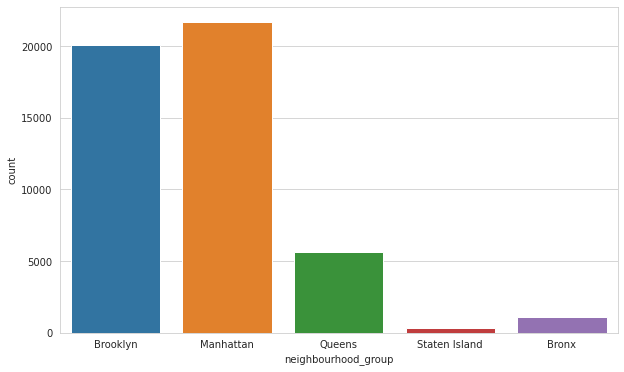

In [85]:
# Chart - 1 visualization code
# Count plot of neighbourhood groups.
plt.figure(figsize=(10,6))
sns.countplot(df_copy['neighbourhood_group'])
plt.show()

##### 1. Why did you pick the specific chart?

* This chart compares the number of listings in different neighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

 * Manhattan has the most number of listings followed by Brooklyn.
 * Staten Island and Bronx have the lowest.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

 * The major chunk of revenue for AirBnb comes from the neighbourhood groups Brooklyn and Manhattan as they have the largest number of listings. Running targetted campaigns to attract clients to Airbnb by showing how lucrative renting through AirBnb can be in Brooklyn and Manhattan.
 * For the rest of the neighbourhood groups, the company could make the people aware of the potential of properties they hold and how they could benefit from AirBnb.    

#### Chart - 2

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


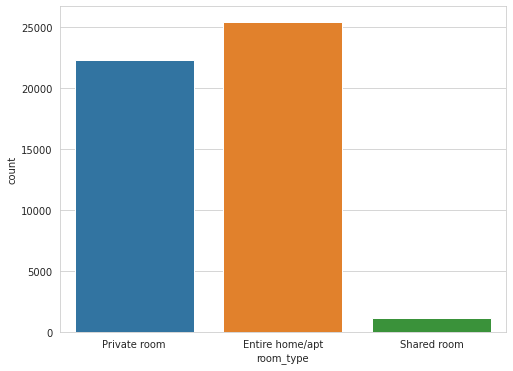

In [86]:
# Chart - 2 visualization code
# count plot of room types.
plt.figure(figsize=(8,6))
sns.countplot(df_copy['room_type'])
plt.show()

##### 1. Why did you pick the specific chart?

* The above chart shows the number of categorical rooms provided by the listings.

##### 2. What is/are the insight(s) found from the chart?

* The number of private rooms and entire home/apt exceeds the number of shared rooms by a large number.
* It can be assumed that the demand for private rooms and apartments are the highest among the different room types. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yeah, it helps creating a positive business impact as the chart helps to identify the categories of room which is of high demand.

#### Chart - 3

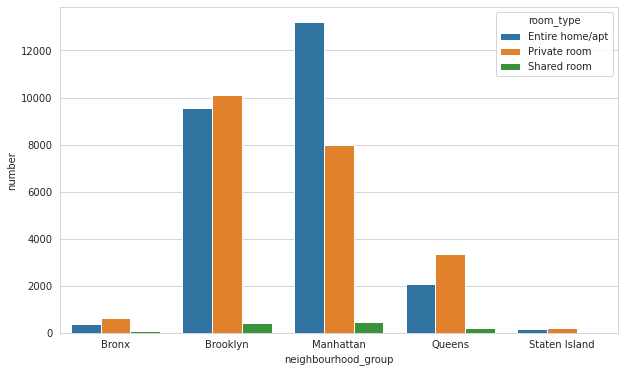

In [87]:
# Chart - 3 visualization code
plt.figure(figsize=(10,6))
x = df_copy.groupby(['room_type', 'neighbourhood_group'])['room_type'].count().reset_index(name='number')
sns.barplot(data=x, x='neighbourhood_group', y='number', hue='room_type')
plt.show()

##### 1. Why did you pick the specific chart?

* This chart helps to enumerate the rooms of different types available in various nerighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

* Manhattan and brooklyn have the most number of rooms among the neighbourhood groups and the most preferred room type is entire home/apartment.
* Bronx and Staten Island have very few rooms available compared to other neighbourhood groups.
* The number of shared rooms are the lowest among different room types.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yeah, this graph helps to identify the most and least preferred room types in different groups and their numbers.

#### Chart - 4

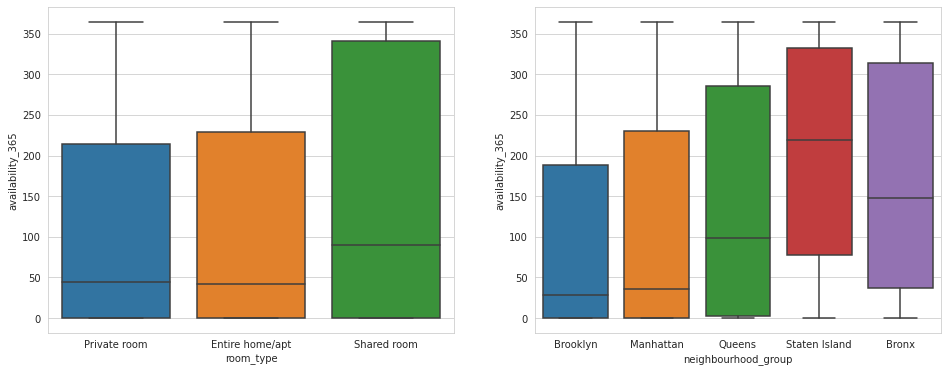

In [88]:
# Chart - 4 visualization code
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.boxplot(data=df, x='room_type', y='availability_365',ax=ax1)
sns.boxplot(data=df, x='neighbourhood_group', y='availability_365',ax=ax2)
plt.show()


##### 1. Why did you pick the specific chart?

* Chart 1 helps to understand the median availability of different room types.
* Chart 2 helps to understand the median availability of rooms in different neighbourhoods.


##### 2. What is/are the insight(s) found from the chart?

* Chart 1 : In more than 50% of the rooms among private room and entire home/apt, the availability around the year is less than 50 while shared rooms are available for nearly 100 days in the year. 
* Chart 2: Brooklyn and Manhattan has least availability of rooms, where as Staten Island and Bronx have rooms available for 150-200 days.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yeah, the above insights helps to create a positive business impact.

#### Chart - 5

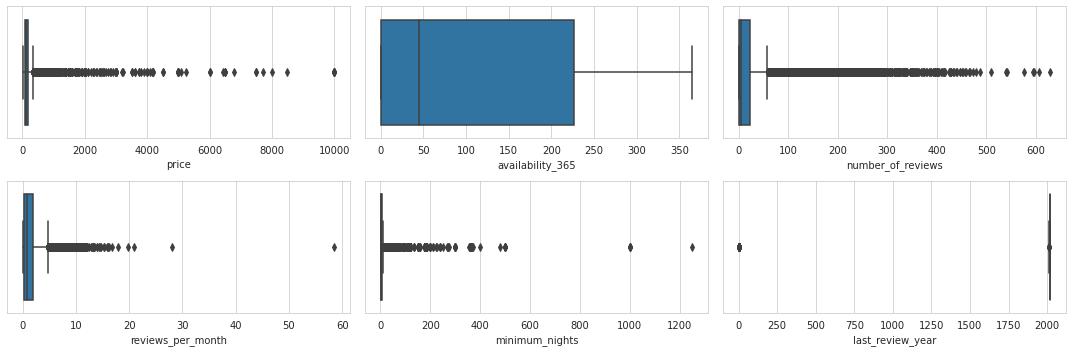

In [89]:
# Chart - 4 visualization code: Box plot
new_df = df_copy.loc[:,['price', 'availability_365', 'number_of_reviews', 'reviews_per_month', 'minimum_nights', 'last_review_year' ]]
rows = 2
columns = 3
fig = plt.figure(figsize= (15,5))
for i, column in enumerate(new_df.columns):
  ax=fig.add_subplot(rows, columns, i+1)
  sns.boxplot(data=new_df, x=new_df[column])
fig.tight_layout()
plt.show()



<Figure size 72x72 with 0 Axes>

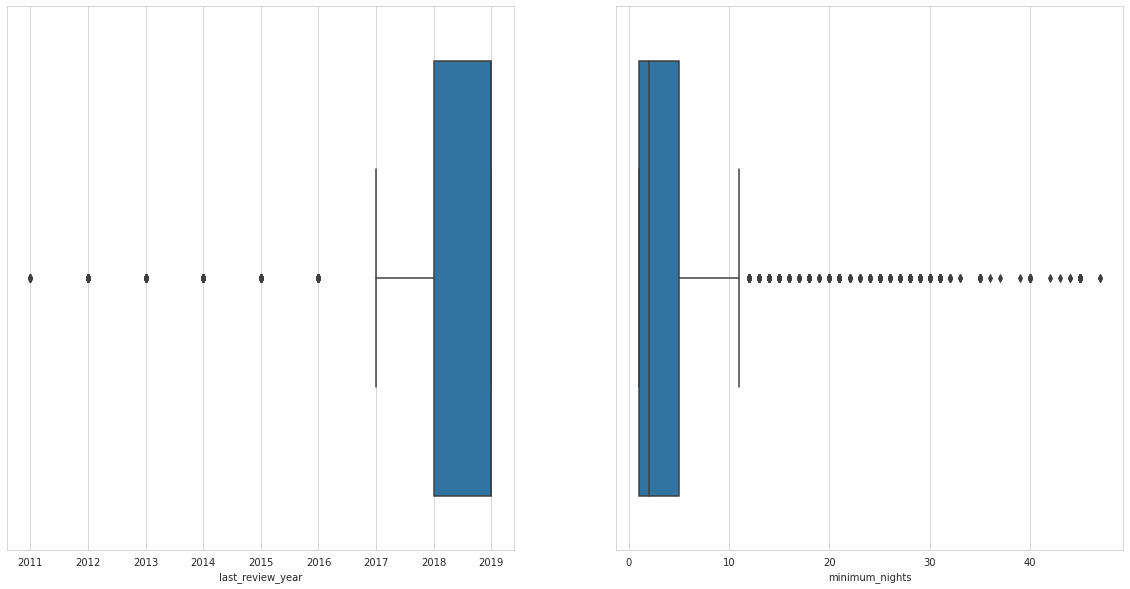

In [90]:
# Box plot after removing outliers.

d = df.loc[df['last_review_year'] > 0, ['last_review_year']].squeeze()
e = df.loc[df['minimum_nights'] < 50, ['minimum_nights']].squeeze()


sns.set_style("whitegrid")
f=plt.figure(figsize=(1,1))
f,axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(x=d, ax=axes[0])
sns.boxplot(x=e, ax=axes[1])

plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


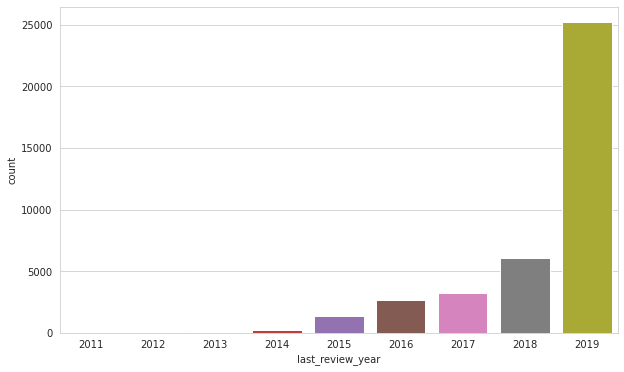

In [91]:
# Countplot of last_review_year for general idea
plt.figure(figsize=(10,6))
sns.countplot(d)
plt.show()

##### 1. Why did you pick the specific chart?

 * These charts gives the distribution of values and helps to find the outliers and understand distribution frequency.

##### 2. What is/are the insight(s) found from the chart?

* For price per night, the values above 500 seems like outliers.
* For number of reviews boxplot, the outliers are established listings with much popularity among the customers.
* The minimum_nights boxplot helps to identify the outliers which are listings with minimum_nights more than one year.
* the last_review boxplot provides information about actively rented and reviewed listings.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Yeah, this will help in optimizing the business. Communicating with the owners of outlying listings in the above plots will be helpful in normalizing the distribution and optimizing the business of both the company and the host.


#### Chart - 6

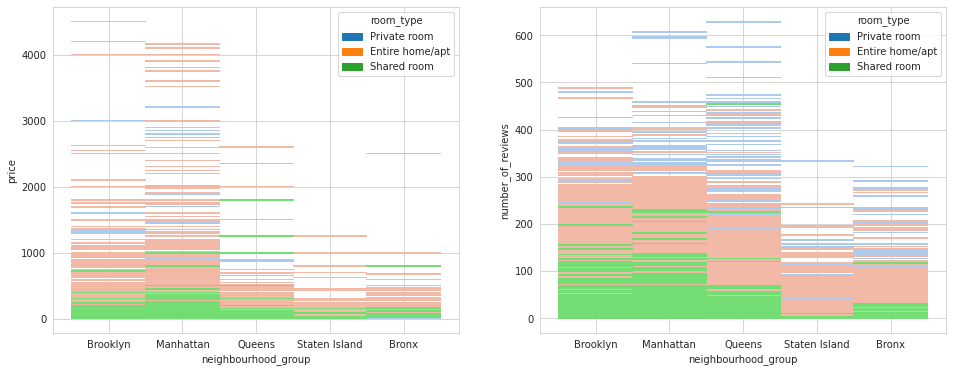

In [92]:
# Chart - 6 visualization code
# Neighbourhood group vs prices
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,6))
sns.histplot(data=df_copy[df_copy['price'] < 5000], x='neighbourhood_group', y='price', hue='room_type', ax=ax1)

sns.histplot(data=df_copy, x='neighbourhood_group', y='number_of_reviews', hue='room_type',ax=ax2)
plt.show()

##### 1. Why did you pick the specific chart?

This Chart is able to beautifully depict the prices and reviews received for various roomtypes in different neighbourhood groups like a spectrum.
* Chart 1 shows the spectrum of prices tagged for individual room types in various neighbourhood groups.
* Chart 2 shows the spectrum of reviews received by individual room types in various neighbourhood groups.

##### 2. What is/are the insight(s) found from the chart?

* In chart 1 the prices of rooms in Manhattan and Brooklyn are distributed in higher values lead by entire home/apt.
* In Chart 2 the number of reviews also shows the same trend. Only the type of room which got the higher reviews shows a significant difference. private rooms are reviewed most.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The following insights helps to create positive business impact:
* The diverse prices of a particular room type can be attributed to the location, population density and quality of life offered by the neighbourhood groups.
* From the second insight it can be assumed that private rooms are most frequently visited by new customers as they are reviewed the most.

#### Chart - 7

<Figure size 432x288 with 0 Axes>

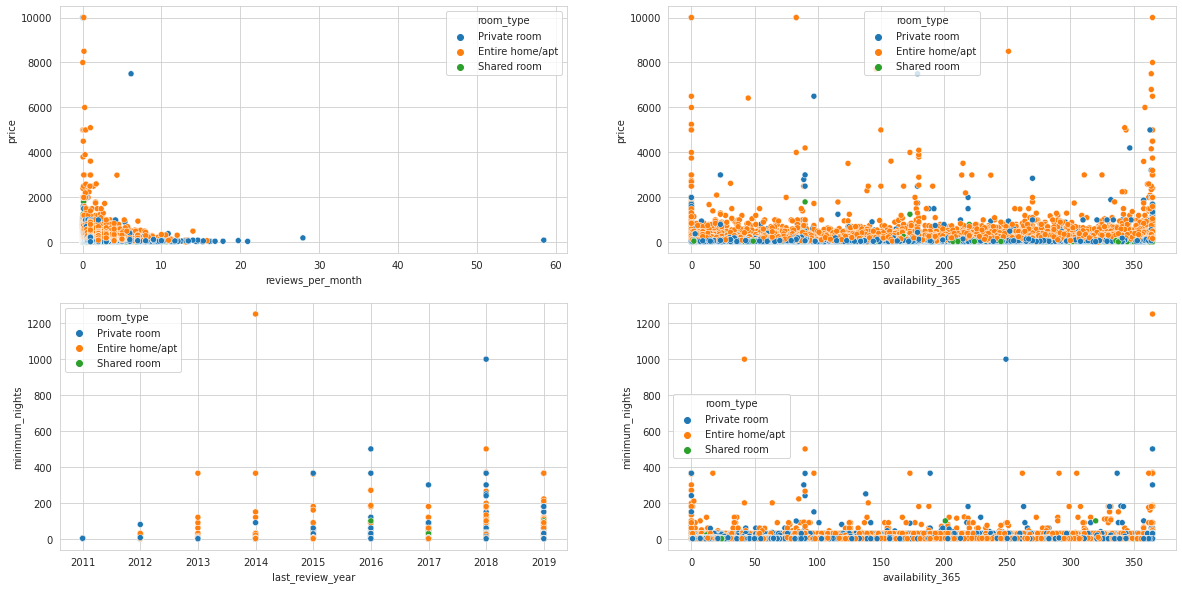

In [93]:
# Chart - 7 visualization code
a= df.loc[df['last_review_year'] > 0, ['minimum_nights']].squeeze()
b = df.loc[df['last_review_year'] > 0, ['last_review_year']].squeeze()
c = df.loc[df['last_review_year'] > 0, ['availability_365']].squeeze()

f = plt.figure()
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
sns.scatterplot(x=df['reviews_per_month'], y= df['price'], ax=axes[0][0], hue=df['room_type'])
sns.scatterplot(x=df['availability_365'], y= df['price'], ax=axes[0][1], hue=df['room_type'])
sns.scatterplot(x=b, y=a, ax=axes[1][0], hue=df['room_type'])
sns.scatterplot(x=c, y=a, ax=axes[1][1], hue=df['room_type'])
plt.show()

##### 1. Why did you pick the specific chart?

* These charts helps to identify where most observations are accumulated.

##### 2. What is/are the insight(s) found from the chart?

* From chart 1 it can be observed that the reviews per month data of hugely priced listings are values closer to one.
* From chart 2 one can easily understand that most of the rooms have their price in the range of 1-1000
* In chart 3, listings with minimum night constraints above 365 are last reviewed before 2019.
* Chart 4 depicts outliers with minimum night constraint of more than 1000

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* The insight from chart 1 tells us that either the hosts of highly priced rooms expects customers preferring luxury over value for money or they have over valued their property which can impact their and company's business.
* The minimum night constraint can be a reason for less frequent review which probably can be a cause for very few customers. This can be inferred from chart 3 where the listing with minimum night constraint of 1200 was last reviewed on 2014.

Addressing above issues can make the business function better.

#### Chart - 8 - Pair plot

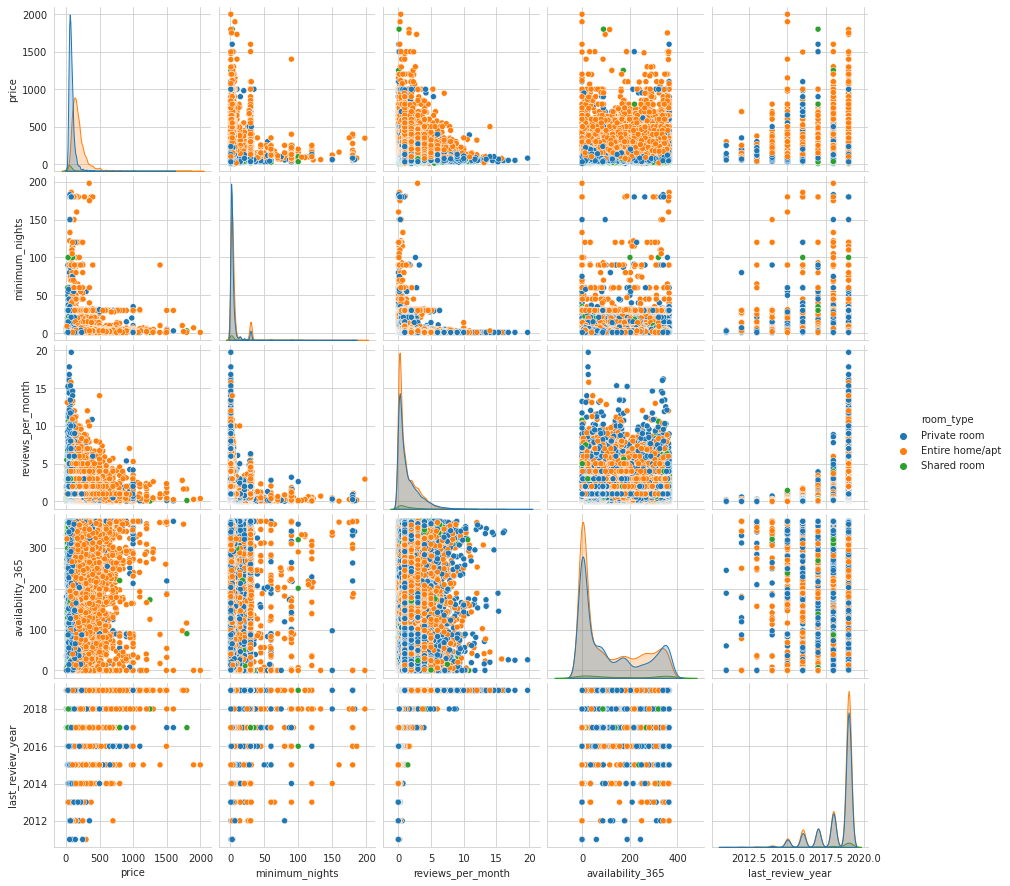

In [94]:
# Chart - 8 visualization code
df_copy1 = df_copy.loc[(df_copy['price'] < 2000) & (df_copy['reviews_per_month'] < 20) & (df_copy['minimum_nights'] < 200)]
df_copy1=df_copy1[['room_type', 'price', 'minimum_nights', 'reviews_per_month', 'availability_365', 'last_review_year']]
sns.pairplot(df_copy1, hue='room_type')
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot helps in comparison of multiple variables in little space.

##### 2. What is/are the insight(s) found from the chart?

* Most of the priced properties have lower minimum night constraints.
* There are some higly priced shared rooms which has lower review per month.
* The last review year before 2015 have 0.5-1 review per month

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Following insights can lead to negative growth:
* Some shared rooms are overpriced.This can affect the business since shared rooms are expected to be cheap.
* For some listings the minimum night constraint inhibits frequent customer visits.This can be inferred from the above pair plot.

Addressing these issues can create a positive business impact.



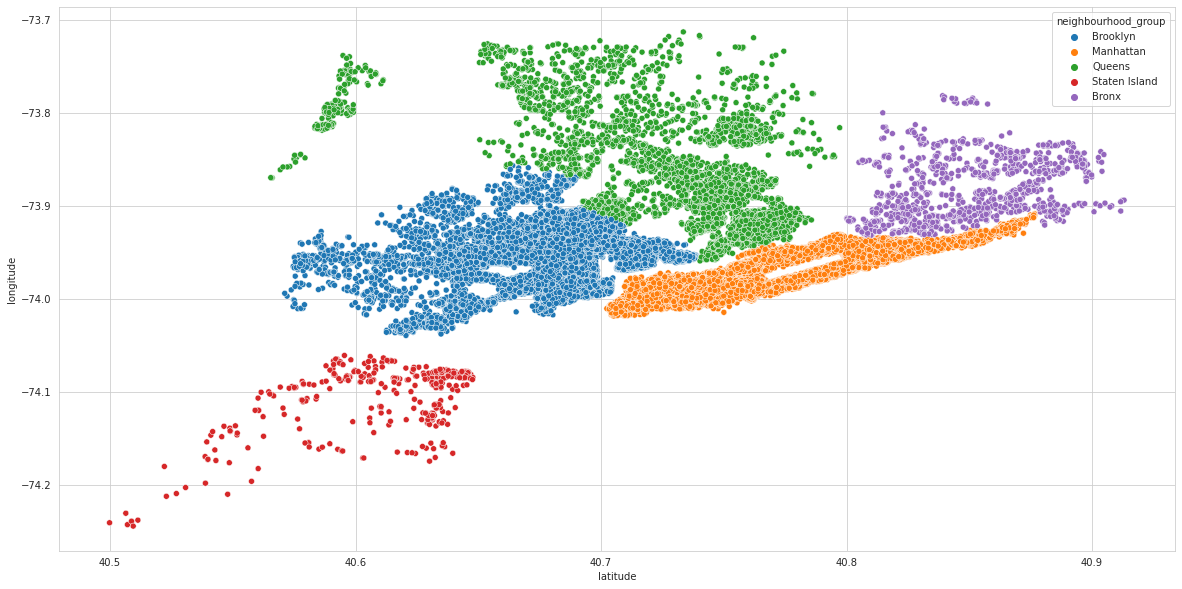

In [95]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df_copy, x='latitude', y='longitude', hue='neighbourhood_group')
plt.show()

#### Chart - 9 - Correlation Heatmap

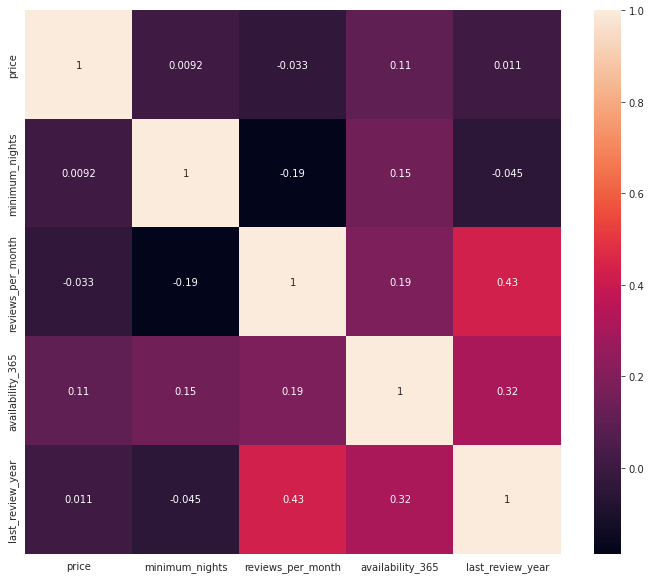

In [96]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,10))
df_copy2 = df_copy1.iloc[:,1:]
corr = df_copy2.corr()
sns.heatmap(corr, annot=True)
plt.show()


##### 1. Why did you pick the specific chart?

* Helps to establish correlation between different variables.

##### 2. What is/are the insight(s) found from the chart?

Negative Correlation:
* Minimum nights and reviews per month.
* Price and reviews per month.
* Minimum nights and last review year.


* The major chunk of revenue for AirBnb comes from the neighbourhood groups Brooklyn and Manhattan as they have the largest number of listings. Running targetted campaigns to attract clients to Airbnb by showing how lucrative renting through AirBnb can be in Brooklyn and Manhattan.
* For the rest of the neighbourhood groups, the company could make the people aware of the potential of properties they hold and how they could benefit from AirBnb.    
* The preference for difference room types understood from above analysis could be used to pitch them to customers more effectively.
* The diverse prices of a particular room type can be attributed to the location, population density and quality of life offered by the neighbourhood groups. 
* From the above analysis it can be assumed that private rooms are most frequently visited by new customers as they are reviewed the most. So this information could be used to promote more hosts providing private rooms. 
* Reducing the minimum nights constraint can increase the frequency of customer visit. This can be established from the correlation heat map.
* Repricing overpriced shared rooms which are expected to be the cheapest, can bring more business to the hosts and to the company.
* For the listings which were not reviewed after 2016-17, more deeper check on reviews and enquiring with the host could help to find out the reason for this. 

# **Conclusion**

After conducting an exploratory data analysis on Airbnb data, it can be concluded that the Airbnb market is highly dynamic and has a vast range of options for travelers. The findings from this analysis show that the majority of listings are concentrated in a few cities, with the top cities having a higher demand for Airbnb accommodations. Additionally, the data highlights that the price of rentals varies greatly depending on the location, type of property, and time of year. Furthermore, it was observed that a significant portion of listings have high ratings, indicating that Airbnb provides quality experiences for travelers. Overall, the analysis provides valuable insights into the Airbnb market and can be used to inform strategic decisions for both travelers and property owners.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***